C:\Users\Nishtha Bandul\.idlerc\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nishtha Bandul\.idlerc\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


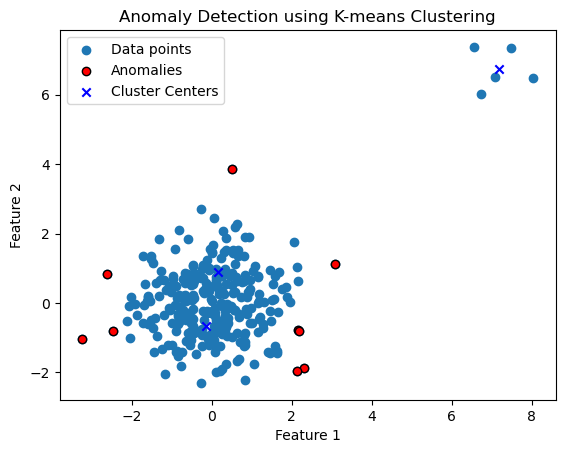

Indices of anomalies: [ 37 104 110 131 142 187 189 239 272]
Anomalous points: [[-2.6197451   0.8219025 ]
 [ 0.51504769  3.85273149]
 [ 2.31465857 -1.86726519]
 [-3.24126734 -1.02438764]
 [ 2.13303337 -1.9520878 ]
 [ 2.15318246 -0.76734756]
 [ 2.18980293 -0.80829829]
 [ 3.07888081  1.11957491]
 [-2.4716445  -0.79689526]]


In [1]:
#1. K-means clustering
#Anomaly detection using K-means clustering involves identifying points that are far from their respective cluster centroids. These points can be 
#considered anomalies because they don't fit well into any of the clusters.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(300, 2)

# Introduce anomalies
X[295:300] = X[295:300] + 7

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit K-means clustering model
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)

# Calculate the distance of each point to its assigned cluster center
distances = cdist(X_scaled, kmeans.cluster_centers_, 'euclidean')
min_distances = np.min(distances, axis=1)

# Z-score for Anomaly Detection
z_scores = np.abs((min_distances - np.mean(min_distances)) / np.std(min_distances))

# Set a threshold for anomalies
threshold = 2.0
anomalies = np.where(z_scores > threshold)

# Plotting
plt.scatter(X[:, 0], X[:, 1], label='Data points')
plt.scatter(X[anomalies][:, 0], X[anomalies][:, 1], color='red', label='Anomalies', edgecolor='black')
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            color='blue', marker='x', label='Cluster Centers')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection using K-means Clustering')
plt.show()

# Print the indices and values of anomalies
print("Indices of anomalies:", anomalies[0])
print("Anomalous points:", X[anomalies])


In [6]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [8]:
#2. FP GROWTH
#Frequent Pattern (FP) Growth is an algorithm primarily used for mining frequent itemsets in a dataset, which is typically used in association rule mining. However, anomaly detection with FP-Growth isn't straightforward because FP-Growth isn't inherently designed for anomaly detection. Instead, you can adapt the concept by identifying transactions or data points that do not contain frequent patterns, treating them as anomalies.
#Here's how you can use the FP-Growth algorithm for anomaly detection in a transactional dataset:

#Step 1: Install Required Libraries
#First, ensure that you have the necessary libraries installed. You can install them using pip:

#pip install mlxtend

import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Example transactional data
dataset = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'jam'],
    ['milk', 'jam'],
    ['milk', 'bread', 'butter', 'jam', 'eggs'],
    ['butter', 'eggs'],
    ['jam', 'butter'],
    ['milk', 'bread', 'butter', 'eggs']
]

# Step 1: Convert the dataset into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 2: Apply the FP-Growth algorithm to find frequent itemsets
min_support = 0.2  # Adjust as needed
frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)

# Step 3: Create a set of frequent itemsets
frequent_items = set(frozenset(itemset) for itemset in frequent_itemsets['itemsets'])

# Step 4: Identify transactions that do not contain frequent patterns
def is_anomalous(transaction, frequent_items):
    for itemset in frequent_items:
        if itemset.issubset(transaction):
            return False
    return True

# Step 5: Check each transaction for anomalies
anomalies = [i for i, transaction in enumerate(dataset) if is_anomalous(set(transaction), frequent_items)]

# Output the anomalies
print("Indices of anomalous transactions:", anomalies)
print("Anomalous transactions:", [dataset[i] for i in anomalies])


Indices of anomalous transactions: []
Anomalous transactions: []


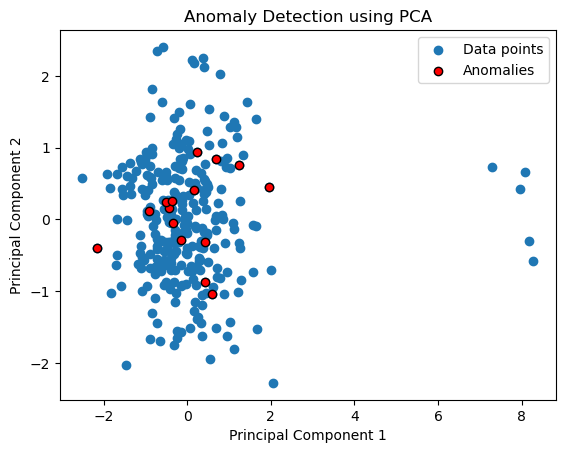

Indices of anomalies: [ 47  87  90 126 132 133 153 159 167 181 210 218 236 274 287]
Anomalous points: [[ 1.30714275 -1.60748323  0.18463386]
 [-0.05952536 -3.24126734 -1.02438764]
 [ 1.44127329 -1.43586215  1.16316375]
 [ 2.18980293 -0.80829829 -0.83972184]
 [-1.71313453  1.35387237 -0.11453985]
 [ 1.23781631 -1.59442766 -0.59937502]
 [-1.19787789  1.96472513  0.03526355]
 [ 0.31125015  3.07888081  1.11957491]
 [ 1.90941664 -1.39856757  0.56296924]
 [ 1.44156862 -2.4716445  -0.79689526]
 [-1.69246463  1.52955032 -0.1580079 ]
 [ 2.5733598   0.05921843  0.01392929]
 [-2.08192941  1.69645637  0.21101747]
 [ 2.29889812 -0.36283856 -0.44550252]
 [-1.51574411  1.5475052   1.79587767]]


In [9]:
#3. Dimensionality reduction
#Anomaly detection using dimensionality reduction techniques can be done by reducing the dimensionality of the data and then analyzing the residuals
#or reconstruction errors. Principal Component Analysis (PCA) is a commonly used technique for this purpose. Points that have high reconstruction
#errors (i.e., points that are poorly represented in the reduced space) can be considered anomalies.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(300, 3)

# Introduce anomalies
X[295:300] = X[295:300] + 5

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Reconstruct the data from the reduced dimensions
X_reconstructed = pca.inverse_transform(X_pca)

# Calculate the reconstruction error
reconstruction_error = np.sum((X_scaled - X_reconstructed) ** 2, axis=1)

# Set a threshold for anomalies (e.g., 95th percentile)
threshold = np.percentile(reconstruction_error, 95)
anomalies = np.where(reconstruction_error > threshold)

# Plotting the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Data points')
plt.scatter(X_pca[anomalies][:, 0], X_pca[anomalies][:, 1], color='red', label='Anomalies', edgecolor='black')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Anomaly Detection using PCA')
plt.show()

# Print the indices and values of anomalies
print("Indices of anomalies:", anomalies[0])
print("Anomalous points:", X[anomalies])


In [11]:
pip install hmmlearn

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ------ --------------------------------- 20.5/125.4 kB ? eta -:--:--
   ------ --------------------------------- 20.5/125.4 kB ? eta -:--:--
   ------------------------- ------------- 81.9/125.4 kB 919.0 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 822.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\Users\Nishtha Bandul\.idlerc\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Nishtha Bandul\AppData\Local\Temp\ipykernel_54156\1235145441.py:30: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  anomalies_indices = np.where(log_likelihood < threshold)[0]


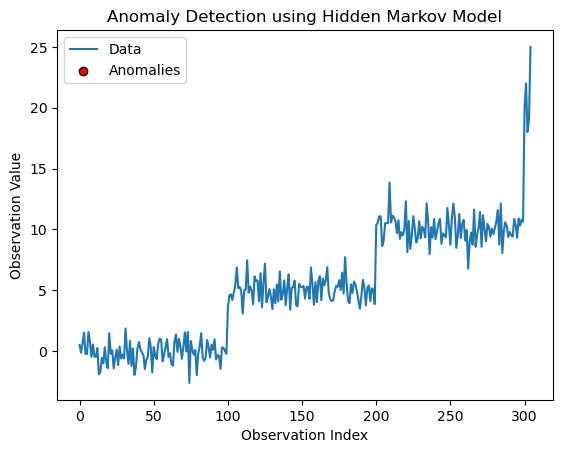

Indices of anomalies: []
Anomalous observations: []


In [2]:
#3. HIDDEN MARKOV MODEL
#Anomaly detection using a Hidden Markov Model (HMM) can be done by identifying sequences of observations that have low probabilities under the model. HMMs are typically used for modeling sequences of data, so this approach is particularly useful in time series anomaly detection.

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Generate synthetic data
np.random.seed(42)
n_samples = 300
normal_data = np.concatenate([
    np.random.normal(0, 1, (n_samples//3, 1)),
    np.random.normal(5, 1, (n_samples//3, 1)),
    np.random.normal(10, 1, (n_samples//3, 1))
])

# Introduce anomalies
anomalies = np.array([[20], [22], [18], [19], [25]])
data_with_anomalies = np.vstack([normal_data, anomalies])

# Fit a Gaussian HMM model
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
model.fit(data_with_anomalies)

# Calculate the log likelihood of each observation
log_likelihood = model.score_samples(data_with_anomalies)[0]

# Detect anomalies: observations with a log likelihood below a certain threshold
threshold = np.percentile(log_likelihood, 5)
anomalies_indices = np.where(log_likelihood < threshold)[0]

# Plotting the data and anomalies
plt.plot(data_with_anomalies, label='Data')
plt.scatter(anomalies_indices, data_with_anomalies[anomalies_indices], color='red', label='Anomalies', edgecolor='black')
plt.xlabel('Observation Index')
plt.ylabel('Observation Value')
plt.title('Anomaly Detection using Hidden Markov Model')
plt.legend()
plt.show()

# Output the indices and values of anomalies
print("Indices of anomalies:", anomalies_indices)
print("Anomalous observations:", data_with_anomalies[anomalies_indices])

